<a href="https://colab.research.google.com/github/dogabaskan/StoneScan/blob/main/test_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import numpy as np
import pandas as pd
import random
import warnings

warnings.filterwarnings('ignore')

# Deep Learning Libraries (TensorFlow / Keras)
import tensorflow as tf
from tensorflow.keras import Sequential, Model, regularizers
from tensorflow.keras.layers import (
    Dense, BatchNormalization, Conv2D, MaxPooling2D, Flatten, Dropout,
    GlobalAveragePooling2D, Activation, Add, GaussianNoise, Reshape,
    SpatialDropout2D, LeakyReLU, ReLU, Lambda, Input
)
from tensorflow.keras.optimizers import Adam, AdamW
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.metrics import CategoricalAccuracy, AUC, Precision, Recall
from tensorflow.keras.applications import ResNet50V2, MobileNetV2
from tensorflow.keras.callbacks import (
    LearningRateScheduler, ReduceLROnPlateau, ModelCheckpoint, EarlyStopping
)
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import plot_model, to_categorical

# Data Analysis and Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.utils import shuffle, class_weight
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.manifold import TSNE
import cv2

# Set seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)


In [ ]:
# prompt: mount drive

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/prediction_results.csv')

In [ ]:
#df['image_path'] = df['image_path'].str.replace('/content/drive/MyDrive/RBC_borealis/splitted_data/test/', '', regex=False)
df

,image_path,true_label,predicted_label,confidence_percentage,display_text
0,/content/drive/MyDrive/RBC_borealis/splitted_d...,Normal,Normal,99.97,True: Normal | Predicted: Normal (99.97%)
1,/content/drive/MyDrive/RBC_borealis/splitted_d...,Normal,Normal,100.00,True: Normal | Predicted: Normal (100.00%)
2,/content/drive/MyDrive/RBC_borealis/splitted_d...,Normal,Normal,100.00,True: Normal | Predicted: Normal (100.00%)
3,/content/drive/MyDrive/RBC_borealis/splitted_d...,Normal,Normal,99.79,True: Normal | Predicted: Normal (99.79%)
4,/content/drive/MyDrive/RBC_borealis/splitted_d...,Normal,Normal,100.00,True: Normal | Predicted: Normal (100.00%)
...,...,...,...,...,...
2487,/content/drive/MyDrive/RBC_borealis/splitted_d...,Stone,Stone,98.93,True: Stone | Predicted: Stone (98.93%)
2488,/content/drive/MyDrive/RBC_borealis/splitted_d...,Stone,Stone,98.06,True: Stone | Predicted: Stone (98.06%)
2489,/content/drive/MyDrive/RBC_borealis/splitted_d...,Stone,Stone,94.91,True: Stone | Predicted: Stone (94.91%)
2490,/content/drive/MyDrive/RBC_borealis/splitted_d...,Stone,Stone,97.23,True: Stone | Predicted: Stone (97.23%)


In [ ]:
mismatched_df = df[df['true_label'] != df['predicted_label']]

In [ ]:
mismatched_df

,image_path,true_label,predicted_label,confidence_percentage,display_text
131,/content/drive/MyDrive/RBC_borealis/splitted_d...,Normal,Tumor,97.45,True: Normal | Predicted: Tumor (97.45%)
141,/content/drive/MyDrive/RBC_borealis/splitted_d...,Normal,Tumor,70.01,True: Normal | Predicted: Tumor (70.01%)
249,/content/drive/MyDrive/RBC_borealis/splitted_d...,Normal,Tumor,61.11,True: Normal | Predicted: Tumor (61.11%)
391,/content/drive/MyDrive/RBC_borealis/splitted_d...,Normal,Tumor,91.52,True: Normal | Predicted: Tumor (91.52%)
505,/content/drive/MyDrive/RBC_borealis/splitted_d...,Normal,Tumor,84.31,True: Normal | Predicted: Tumor (84.31%)
562,/content/drive/MyDrive/RBC_borealis/splitted_d...,Normal,Tumor,69.89,True: Normal | Predicted: Tumor (69.89%)
574,/content/drive/MyDrive/RBC_borealis/splitted_d...,Normal,Tumor,59.90,True: Normal | Predicted: Tumor (59.90%)
644,/content/drive/MyDrive/RBC_borealis/splitted_d...,Normal,Tumor,66.48,True: Normal | Predicted: Tumor (66.48%)
753,/content/drive/MyDrive/RBC_borealis/splitted_d...,Normal,Tumor,54.35,True: Normal | Predicted: Tumor (54.35%)
1389,/content/drive/MyDrive/RBC_borealis/splitted_d...,Cyst,Stone,81.94,True: Cyst | Predicted: Stone (81.94%)


In [ ]:
x= df == df['confidence_percentage'].max()
x

,image_path,true_label,predicted_label,confidence_percentage,display_text
0,False,False,False,False,False
1,False,False,False,True,False
2,False,False,False,True,False
3,False,False,False,False,False
4,False,False,False,True,False
...,...,...,...,...,...
2487,False,False,False,False,False
2488,False,False,False,False,False
2489,False,False,False,False,False
2490,False,False,False,False,False


In [ ]:
import tensorflow as tf
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models, Input

# --- 1. Define CNN model using Functional API ---
inputs = Input(shape=(224, 224, 3))

x = layers.Conv2D(64, 3, padding='same')(inputs)
x = layers.LeakyReLU()(x)
x = layers.BatchNormalization()(x)
x = layers.MaxPooling2D()(x)

x = layers.Conv2D(128, 3, padding='same')(x)
x = layers.LeakyReLU()(x)
x = layers.BatchNormalization()(x)
x = layers.MaxPooling2D()(x)

x = layers.Conv2D(256, 3, padding='same', name="last_conv")(x)
x = layers.LeakyReLU()(x)
x = layers.BatchNormalization()(x)
x = layers.MaxPooling2D()(x)

x = layers.GlobalMaxPooling2D()(x)
x = layers.Dense(256)(x)
x = layers.LeakyReLU()(x)
x = layers.Dense(128)(x)
x = layers.LeakyReLU()(x)
outputs = layers.Dense(4, activation='softmax')(x)

model = models.Model(inputs, outputs)

# --- 2. Grad-CAM Functions ---

def make_gradcam_heatmap(img_array, model, last_conv_layer_name="last_conv", pred_index=None):
    grad_model = tf.keras.models.Model(
        [model.inputs],
        [model.get_layer(last_conv_layer_name).output, model.output]
    )

    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(predictions[0])
        class_channel = predictions[:, pred_index]

    grads = tape.gradient(class_channel, conv_outputs)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))
    conv_outputs = conv_outputs[0]
    heatmap = conv_outputs @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()
def enhance_reds_only(heatmap, min_activation=0.6):
    # Normalize heatmap
    heatmap = np.clip(heatmap, 0, 1)

    # Zero out low-activation regions (only keep strong activations)
    heatmap[heatmap < min_activation] = 0

    # Stretch remaining activations
    if np.max(heatmap) != 0:
        heatmap = heatmap / np.max(heatmap)

    return heatmap

def display_gradcam(img, heatmap, alpha=0.5):
    # Enhance only high-activation zones (reds)
    heatmap = enhance_reds_only(heatmap, min_activation=0.6)

    # Resize and convert to color
    heatmap_resized = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
    heatmap_color = cv2.applyColorMap(np.uint8(255 * heatmap_resized), cv2.COLORMAP_JET)

    # Improve contrast of original image
    img = cv2.convertScaleAbs(img, alpha=1.2, beta=10)

    # Superimpose
    superimposed_img = cv2.addWeighted(heatmap_color, alpha, img, 1 - alpha, 0)

    # Plot
    fig, axs = plt.subplots(1, 2, figsize=(10, 5))
    axs[0].imshow(img.astype("uint8"))
    axs[0].set_title("Original Image")
    axs[0].axis('off')

    axs[1].imshow(superimposed_img.astype("uint8"))
    axs[1].set_title("Grad-CAM (Enhanced Reds)")
    axs[1].axis('off')

    plt.tight_layout()
    plt.show()


'''
# --- 3. Load image and run Grad-CAM ---
for i in range (len(mismatched_df)):
  img_path = mismatched_df.iloc[i]['image_path']
  print(img_path)
  img = tf.keras.preprocessing.image.load_img(img_path, target_size=(224, 224))
  img_array = tf.keras.preprocessing.image.img_to_array(img)
  img_array = np.expand_dims(img_array, axis=0) / 255.0

  print("Predicted Label:", mismatched_df.iloc[i]['predicted_label'])
  print("True Label:", mismatched_df.iloc[i]['true_label'])
  # Run Grad-CAM
  heatmap = make_gradcam_heatmap(img_array, model)
  display_gradcam(np.uint8(img_array[0] * 255), heatmap)'''


'\n# --- 3. Load image and run Grad-CAM ---\nfor i in range (len(mismatched_df)):\n  img_path = mismatched_df.iloc[i][\'image_path\']\n  print(img_path)\n  img = tf.keras.preprocessing.image.load_img(img_path, target_size=(224, 224))\n  img_array = tf.keras.preprocessing.image.img_to_array(img)\n  img_array = np.expand_dims(img_array, axis=0) / 255.0\n\n  print("Predicted Label:", mismatched_df.iloc[i][\'predicted_label\'])\n  print("True Label:", mismatched_df.iloc[i][\'true_label\'])\n  # Run Grad-CAM\n  heatmap = make_gradcam_heatmap(img_array, model)\n  display_gradcam(np.uint8(img_array[0] * 255), heatmap)'

/content/drive/MyDrive/RBC_borealis/splitted_data/test/Tumor/Tumor- (1968).jpg
Predicted Label: Tumor
True Label: Stone


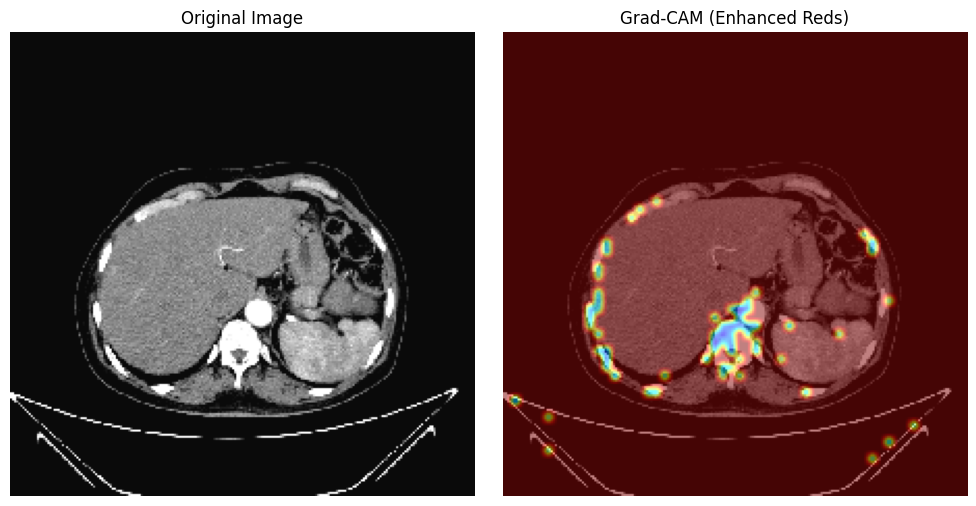

In [ ]:

img_path =df.iloc[2124]['image_path']
print(img_path)
img = tf.keras.preprocessing.image.load_img(img_path, target_size=(224, 224))
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0) / 255.0

print("Predicted Label:", df.iloc[1800]['predicted_label'])
print("True Label:", df.iloc[2348]['true_label'])

heatmap = make_gradcam_heatmap(img_array, model)
display_gradcam(np.uint8(img_array[0] * 255), heatmap)